# Sentiment-Based Product Recommendation System

## **Introduction**
E-commerce platforms have revolutionized the way consumers shop for products, offering a seamless and personalized shopping experience. To enhance user satisfaction and retain a competitive edge, it is essential to provide accurate and effective product recommendations. This project focuses on building a **Sentiment-Based Product Recommendation System** for the e-commerce platform **Ebuss**.

By analyzing product reviews and ratings, this system aims to recommend products tailored to individual users' preferences. Additionally, it integrates sentiment analysis to further refine the recommendations.

---

## **Problem Statement**
Ebuss, a leading e-commerce company, aims to enhance its recommendation engine by incorporating user sentiment analysis. The goal is to build a comprehensive sentiment-based recommendation system that:

1. Analyzes user reviews and ratings to determine sentiments.
2. Develops a recommendation system using user and product data.
3. Improves recommendations using sentiment analysis to filter top-rated products.
4. Deploys the solution as a web application for real-time user interaction.

---

## **Steps to be Performed**
1. **Exploratory Data Analysis (EDA)**:
   - Understand the structure, distribution, and trends in the dataset.
   - Visualize the data to derive insights.

2. **Data Cleaning & Pre-Processing**:
   - Address missing values, duplicates, and irrelevant columns.
   - Convert columns to appropriate data types.

3. **Text Processing**:
   - Clean review text by removing noise (e.g., special characters, stopwords).
   - Perform tokenization, stemming, and lemmatization.

4. **Feature Extraction**:
   - Convert textual data into numerical representations using:
     - Bag-of-Words (BoW)
     - TF-IDF Vectorization
     - Word Embeddings (if applicable)

5. **Model Building**:
   - Train at least three Machine Learning (ML) models (Logistic Regression, Random Forest, XGBoost, Naive Bayes).
   - Address class imbalance and perform hyperparameter tuning.
   - Select the best-performing model for sentiment prediction.

6. **Recommendation System**:
   - Build and evaluate:
     - User-based recommendation system.
     - Item-based recommendation system.
   - Select the best-suited recommendation approach.

7. **Integration with Sentiment Analysis**:
   - Recommend 20 products to a user using the recommendation system.
   - Filter the top 5 products based on sentiment analysis of user reviews.

8. **Deployment**:
   - Build an end-to-end web application using Flask.
   - Allow users to input a username and receive the top 5 product recommendations based on the system.

---

## **Dataset Overview**
The dataset consists of 30,000 product reviews provided by over 20,000 users across more than 200 product categories. Key attributes include:
- **Product ID**: Unique identifier for each product.
- **User ID**: Unique identifier for each user.
- **Rating**: Numerical rating given by the user.
- **Review Text**: User-provided review for a product.
- **Other Attributes**: Details regarding products and users.

---

In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Required Libraries
import re, spacy, string
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter
from IPython.display import display
from datetime import datetime
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Downloading NLTK Datasets
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import pickle
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Loading the data

In [5]:
# Loading the dataset
reviews= pd.read_csv("sample30.csv", encoding='utf-8')
reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [6]:
# Statistical Summary of Numerical Columns
reviews.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
# Dataset Information
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
# Dataset Shape
reviews.shape

(30000, 15)

In [9]:
# Total reviews
total = len(reviews['reviews_text'])
print ("Number of reviews:",total)

# Total unique reviewers
print ("Number of unique reviewers:",len(reviews['reviews_username'].unique()))
reviewer_prop = float(len(reviews['reviews_username'].unique())/total)
print ("Prop of unique reviewers:",round(reviewer_prop,3))

# Average star score
print ("Average rating score:",round(reviews['reviews_rating'].mean(),3))

Number of reviews: 30000
Number of unique reviewers: 24915
Prop of unique reviewers: 0.831
Average rating score: 4.483


**Inference:**
- **Total reviews**: **30,000**.
- **Unique reviewers**: **24,915**, meaning most reviewers contribute only a single review.
- **Proportion of unique reviewers**: **83.1%**.
- **Average rating**: **4.48**, confirming a positive bias in reviews.

In [10]:
# Data overivew
print('Rows:', reviews.shape[0])
print('Columns:', reviews.shape[1])
print('\nFeatures:', reviews.columns.to_list())
print('\nMissing values:', reviews.isnull().values.sum())
print('\nUnique values:\n', reviews.nunique())

Rows: 30000
Columns: 15

Features: ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

Missing values: 74980

Unique values:
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


**Inference:**
- **Unique Values**: Some features like `id`, `brand`, `categories`, and `manufacturer` have a moderate number of unique values, while `reviews_rating` and `user_sentiment` have low cardinality.
- **Missing Values**: A total of **74,980** missing values are present, which will require attention in the data cleaning step.

## STEP 1 & 2: Exploratory Data Analysis - Data Cleaning and Pre-Processing

In [11]:
# Missing Value Counts
reviews.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [12]:
# Missing Value Percentages
(reviews.isnull().sum()/len(reviews)*100).sort_values(ascending=False)

reviews_userProvince    99.433333
reviews_userCity        93.570000
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_title            0.633333
manufacturer             0.470000
reviews_username         0.210000
reviews_date             0.153333
user_sentiment           0.003333
id                       0.000000
brand                    0.000000
categories               0.000000
name                     0.000000
reviews_rating           0.000000
reviews_text             0.000000
dtype: float64

**Inference:**
- **Critical Observations:** `reviews_userProvince` (99.43%) and `reviews_userCity` (93.57%) are almost entirely missing, justifying their removal.


In [13]:
# From the null values percentages, columns "reviews_userCity" and "reviews_userProvince" can be dropped
reviews= reviews.drop(columns=['reviews_userCity','reviews_userProvince'],axis=1)

- This reduces the dataset to 13 columns and ensures that subsequent analysis focuses on more reliable features.

In [14]:
# Let's now analyze the one missing row of "user_sentiment"
missing_row = reviews[reviews['user_sentiment'].isnull()]
missing_row

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


**Inference:** The missing value appears in a review with a positive context. It can be reasonably imputed as 'Positive' based on the content of the review.

In [15]:
# As we can see as the review is positive from the user we can impute the null value as positive
reviews.loc[reviews['user_sentiment'].isnull(), 'user_sentiment'] = 'Positive'

In [16]:
reviews['user_sentiment'].isnull().sum()

0

In [17]:
# Let's map the categorical column "user_sentiment" to numerical 1 or 0 for modelling
reviews['user_sentiment'] = reviews['user_sentiment'].map({'Positive':1,'Negative':0})

# View the value count for the column
reviews["user_sentiment"].value_counts(normalize=True)

user_sentiment
1    0.887767
0    0.112233
Name: proportion, dtype: float64

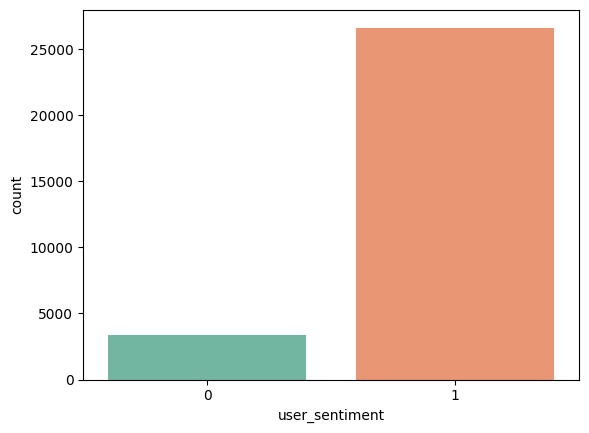

In [18]:
# Visualize using count plot
sns.countplot(x='user_sentiment', data=reviews, palette="Set2")
plt.show()

- The plot clearly shows the dominance of positive reviews, which aligns with the numerical proportions of **88.8% positive** and **11.2% negative** sentiments. We may have to do Class Imbalance techniques during modelling.

In [19]:
reviews['reviews_rating'].describe()

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [20]:
reviews['reviews_rating'].value_counts()

reviews_rating
5    20831
4     6020
1     1384
3     1345
2      420
Name: count, dtype: int64

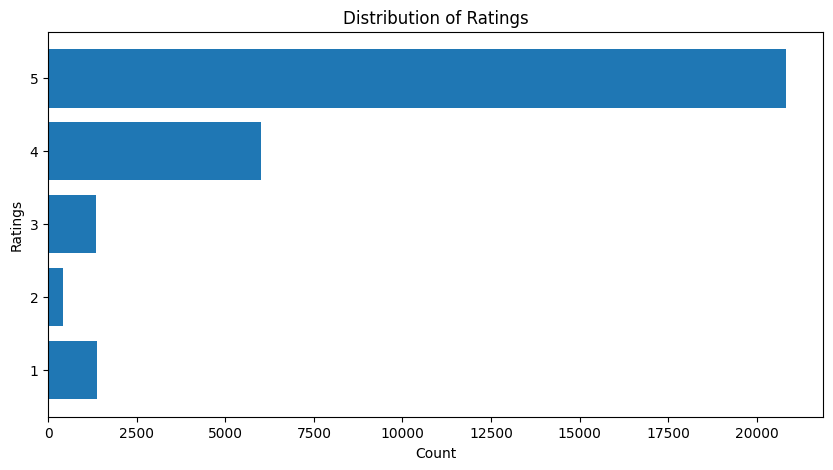

In [21]:
# Plotting number of occurences for each rating
plt.figure(figsize=[10,5])
x = list(reviews['reviews_rating'].value_counts().index)
y = list(reviews['reviews_rating'].value_counts())

plt.barh(x, y)
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.show()

**Inference:** The chart shows a strong skew towards positive ratings, with the majority being 5-stars, followed by 4-stars. Lower ratings (1, 2, and 3-stars) are significantly less frequent, indicating high overall satisfaction.

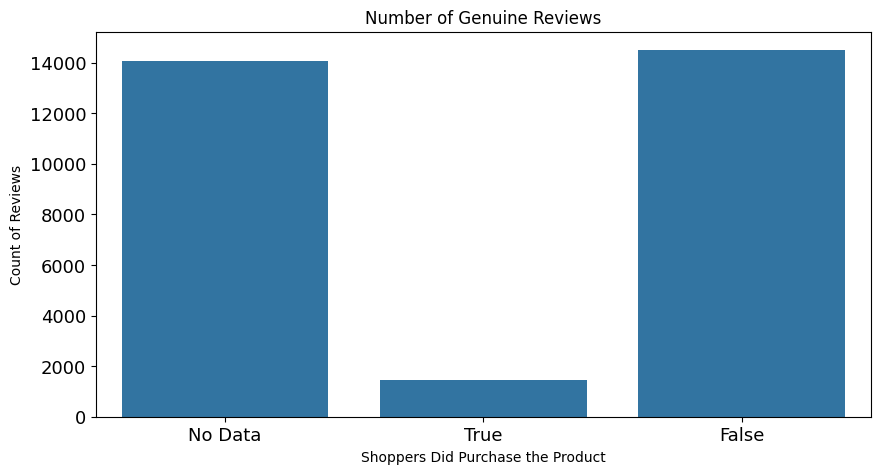

In [22]:
# Replace NaN values in the 'reviews_didPurchase' column with 'No Data' to indicate missing information
reviews['reviews_didPurchase'].fillna('No Data', inplace=True)

# Distribution of reviews for actual purchasing customers
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=reviews, x='reviews_didPurchase', ax=ax)
ax.set_xlabel("Shoppers Did Purchase the Product")
ax.set_ylabel("Count of Reviews")
ax.set_title("Number of Genuine Reviews")
ax.tick_params(labelsize=13)
plt.show()

**Inference:** The plot reveals that a large number of reviews are associated with missing values (`'No Data'`), while a significant proportion are genuine reviews from customers who purchased the product. This emphasizes the need to interpret this feature carefully in subsequent analysis.

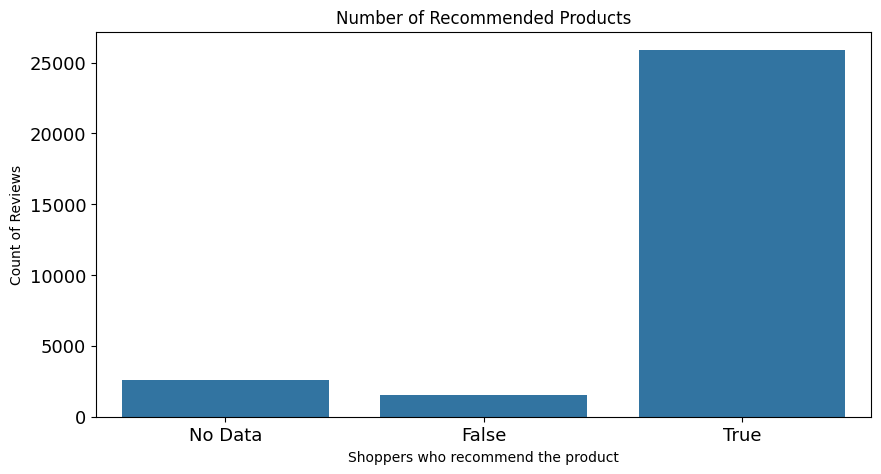

In [23]:
# Replace NaN values in the 'reviews_doRecommend' column with 'No Data' to indicate missing information
reviews['reviews_doRecommend'].fillna('No Data', inplace=True)

# Distribution of reviews for actual purchasing customers
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=reviews, x='reviews_doRecommend', ax=ax)
ax.set_xlabel("Shoppers who recommend the product")
ax.set_ylabel("Count of Reviews")
ax.set_title("Number of Recommended Products")
ax.tick_params(labelsize=13)
plt.show()

**Inference:** Many products were recommended by the users but this column won't be significant for our analysis as this is not reliable and we are about to make our own recommendation model.

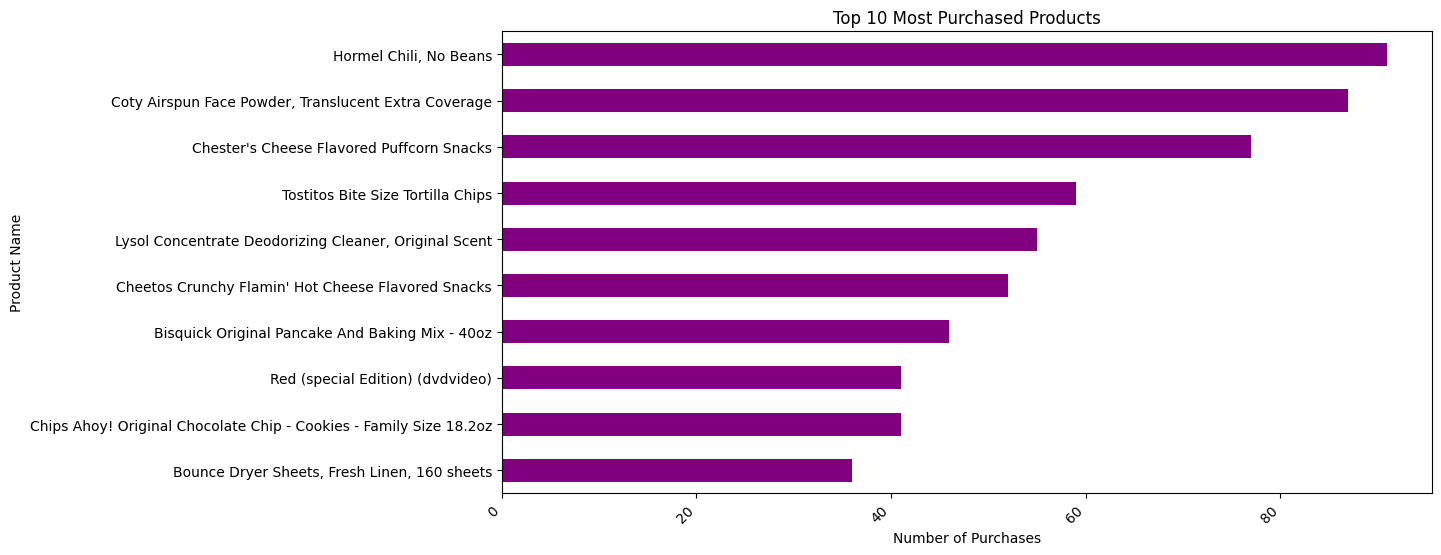

In [24]:
# Top 10 Most Purchased Products
most_purchased_products = reviews[reviews['reviews_didPurchase'] == True]['name'].value_counts().head(10).sort_values(ascending=
                                                                                                                      True)

plt.figure(figsize=(12, 6))
most_purchased_products.plot(kind='barh', color='purple')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.show()

**Inference:** The chart reveals the most popular products, helping identify trends in customer preferences. These insights could guide marketing and inventory decisions.

In [25]:
# Descriptive Statistics for Reviews with Positive Sentiments
reviews[reviews["user_sentiment"]==1]["reviews_rating"].describe()

count    26633.000000
mean         4.560395
std          0.865182
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [26]:
# Descriptive Statistics for Reviews with Negative Sentiments
reviews[reviews["user_sentiment"]==0]["reviews_rating"].describe()

count    3367.000000
mean        3.871993
std         1.537589
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews_rating, dtype: float64

In [27]:
# Reviews with Positive Sentiments but Ratings Less Than 4
reviews[(reviews["user_sentiment"]==1)&(reviews["reviews_rating"]<4)][["reviews_title","reviews_text","reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is noth...,1
11,Waste of Money,Purchased this thinking it would have some sor...,1
14,Disappointed,First time purchase of this type of product. M...,1
18,Pretty nice,I bought this because it had better reviews th...,3
54,New formula is terrible,I used (and loved) this product for several ye...,1
...,...,...,...
29050,Didn't Do Much For Dryness,I received this product from Influenster. I ab...,3
29051,Not the best,I used this product for a month straight befor...,3
29053,clay conditioning,Got this item as a compliment from influenster...,3
29054,Eh,I am not in love with the conditioner. The cla...,3


In [28]:
# Reviews with Negative Sentiments but Ratings Greater Than or Equal to 4
reviews[(reviews["user_sentiment"]==0)&(reviews["reviews_rating"]>=4)][["reviews_title","reviews_text","reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and h...,4
96,This product has made a real difference on my ...,In only a week I can see the difference in my ...,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and sup...,4
106,Very rich cream,I like to use this cream on my neck and collar...,4
117,Not greasy,I finally found a moisturizing product that wi...,4
...,...,...,...
29818,Great Product,I received a complimentary sample of this prod...,5
29855,Great,This has prolonged the color in my hair! Not o...,5
29858,Makes my hair soft and shiny without excess oil!,This conditioner makes my hair very soft witho...,5
29862,Great Conditioner,This conditioner has become a staple in my hai...,5


In [29]:
# Creating a contingency table to examine the relationship between user sentiments and review ratings
pd.crosstab(reviews["user_sentiment"], reviews["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18971,26633
All,1384,420,1345,6020,20831,30000


The results indicate a mismatch between `review_rating` and `user_sentiment`, where some high ratings are marked as negative sentiments, and some low ratings are marked as positive. To resolve this, we will adjust `user_sentiment` as follows:

- Set to **0** (negative) if `reviews_rating` is less than 4.
- Set to **1** (positive) if `reviews_rating` is 4 or higher.

This ensures consistency between ratings and sentiment labels, improving the dataset for modeling.

In [30]:
reviews.loc[(reviews["user_sentiment"]==1) & (reviews["reviews_rating"]<4), "user_sentiment"] = 0
reviews.loc[(reviews["user_sentiment"]==0) & (reviews["reviews_rating"]>=4), "user_sentiment"] = 1

pd.crosstab(reviews["user_sentiment"], reviews["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20831,26851
All,1384,420,1345,6020,20831,30000


Based on the corrected crosstab, we can observe that there are no longer any mismatches between the `reviews_rating` and `user_sentiment`. All reviews with a rating of 4 or higher are now correctly labeled as having positive sentiment, while reviews with a rating below 4 are appropriately labeled as having negative sentiment.

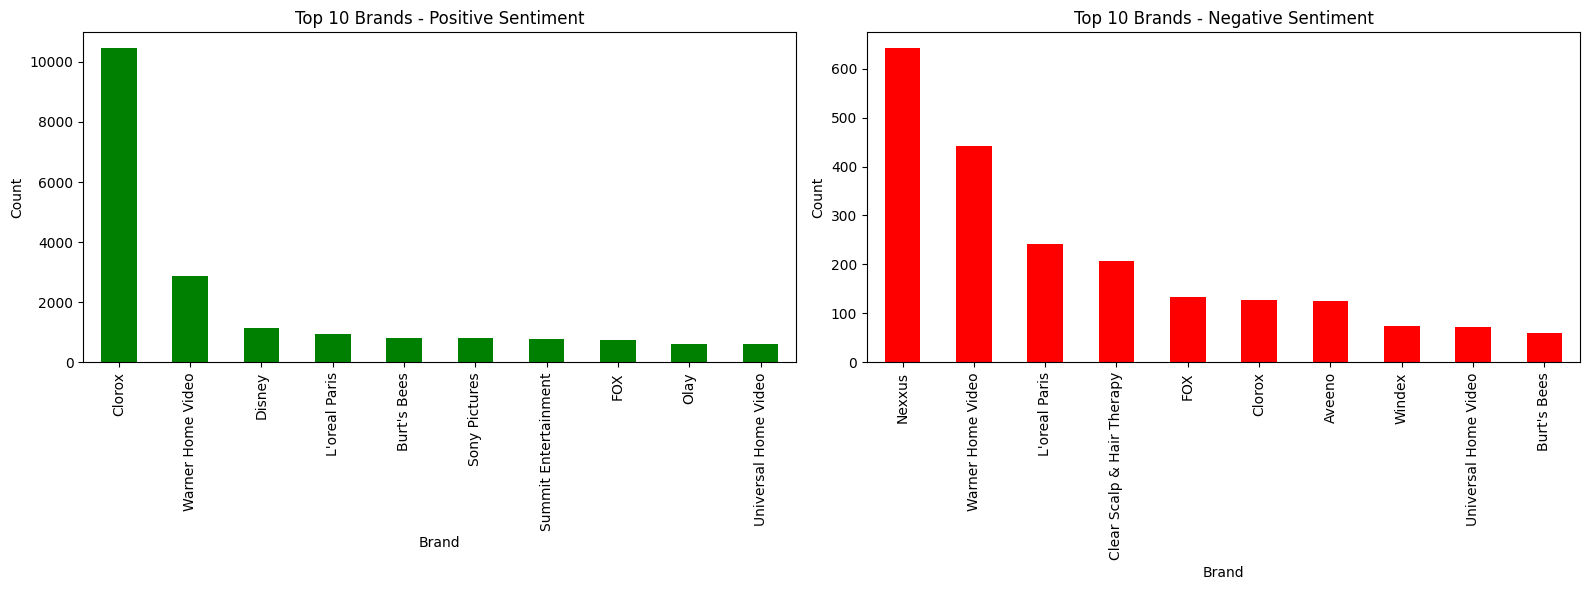

In [31]:
# Filter the top 10 brands among the positive and negative sentiments
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first bar chart for positive sentiment
reviews[reviews['user_sentiment'] == 1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(
    kind='bar',color='g', ax=axes[0])

axes[0].set_title('Top 10 Brands - Positive Sentiment')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Brand')

# Plot the second bar chart for negative sentiment
reviews[reviews['user_sentiment'] == 0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(
    kind='bar',color='r',ax=axes[1])

axes[1].set_title('Top 10 Brands - Negative Sentiment')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Brand')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [32]:
def filter_products(productId, pos=1):
    review_count = reviews[(reviews.id==productId) & (reviews.user_sentiment==pos)]['brand'].count()
    return review_count

df_custom =  reviews.groupby('id', as_index=False)['user_sentiment'].count()
df_custom["pos_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 1))
df_custom["neg_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 0))
df_custom.head(10)

,id,user_sentiment,pos_review_count,neg_review_count
0,AV13O1A8GV-KLJ3akUyj,1,1,0
1,AV14LG0R-jtxr-f38QfS,2,2,0
2,AV16khLE-jtxr-f38VFn,27,10,17
3,AV1YGDqsGV-KLJ3adc-O,348,274,74
4,AV1YIch7GV-KLJ3addeG,1,1,0
5,AV1YlENIglJLPUi8IHsX,17,14,3
6,AV1YmBrdGV-KLJ3adewb,18,17,1
7,AV1YmDL9vKc47QAVgr7_,89,74,15
8,AV1Ymf_rglJLPUi8II2v,34,34,0
9,AV1Yn94nvKc47QAVgtst,25,24,1


In [33]:
df_custom['sentiment %'] = np.round((df_custom['pos_review_count']/df_custom['user_sentiment'])*100,2)
df_custom.sort_values(by='sentiment %', ascending=False)[:20]

,id,user_sentiment,pos_review_count,neg_review_count,sentiment %
0,AV13O1A8GV-KLJ3akUyj,1,1,0,100.0
82,AVpf-lMV1cnluZ0-ub0_,4,4,0,100.0
138,AVpfE5UF1cnluZ0-dY1N,2,2,0,100.0
141,AVpfEqFbilAPnD_xUV28,4,4,0,100.0
143,AVpfErGsLJeJML431yRX,1,1,0,100.0
145,AVpfFGqP1cnluZ0-ddjG,1,1,0,100.0
149,AVpfGRUHilAPnD_xU5nU,5,5,0,100.0
150,AVpfGTRQLJeJML432WYA,8,8,0,100.0
151,AVpfG_ujilAPnD_xVI8L,8,8,0,100.0
153,AVpfH2Rx1cnluZ0-eYtu,3,3,0,100.0


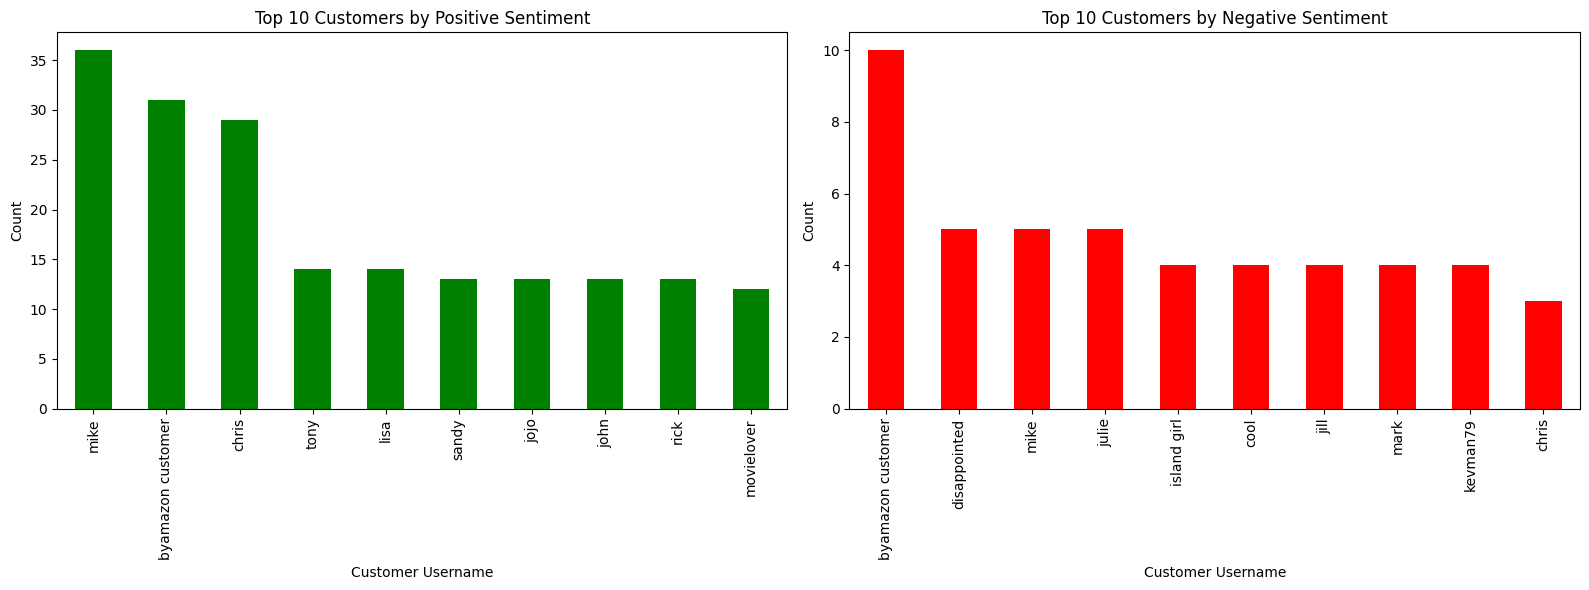

In [34]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the first bar chart for positive sentiment customers
reviews[reviews['user_sentiment'] == 1].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(
    kind='bar',color='g',ax=axes[0])

axes[0].set_title('Top 10 Customers by Positive Sentiment')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Customer Username')

# Plot the second bar chart for negative sentiment customers
reviews[reviews['user_sentiment'] == 0].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(
    kind='bar',color='r',ax=axes[1])

axes[1].set_title('Top 10 Customers by Negative Sentiment')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Customer Username')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Inference:**
- **Positive Sentiment**: A small group of users dominates the positive review count, reflecting high satisfaction or frequent purchasing behavior.
- **Negative Sentiment**: Fewer customers contribute most of the negative reviews, indicating potential dissatisfaction or specific issues with certain products.

In [35]:
# Removing nan/null from username
reviews = reviews[~reviews.reviews_username.isnull()]

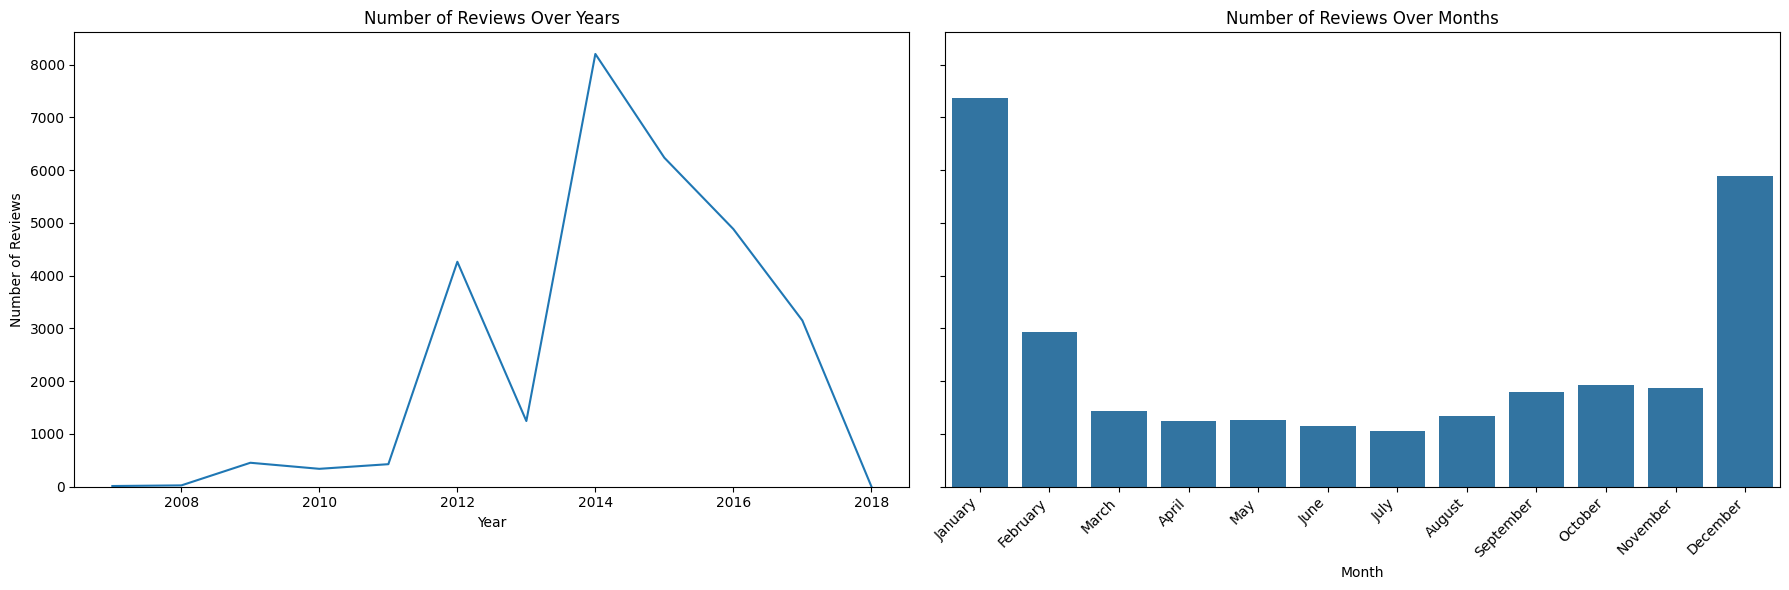

In [36]:
# Convert 'reviews_date' to datetime format
reviews['reviews_date'] = pd.to_datetime(reviews['reviews_date'], errors='coerce')

# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Group data by year and count the number of reviews
yearly = (reviews
          .groupby(reviews['reviews_date'].dt.year)['reviews_username']
          .count()
          .reset_index()
          .rename(columns={'reviews_username': 'no_of_reviews', 'reviews_date': 'year'}))

# Group by month (ignoring year) and count the number of reviews
monthly = (reviews
           .groupby(reviews['reviews_date'].dt.month)['reviews_username']
           .count()
           .reset_index()
           .rename(columns={'reviews_username': 'no_of_reviews', 'reviews_date': 'month'}))

# Create the yearly line plot
sns.lineplot(x='year', y='no_of_reviews', data=yearly, ax=axes[0])
axes[0].set_title('Number of Reviews Over Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Reviews')

# Define month names for x-axis labels
month_names = ["January", "February", "March", "April", "May", "June", "July", 
               "August", "September", "October", "November", "December"]

# Create the monthly bar plot
sns.barplot(x='month', y='no_of_reviews', data=monthly, ax=axes[1])
axes[1].set_title('Number of Reviews Over Months')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Reviews')

# Set x-axis labels to month names
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(month_names, rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Inference:**
- **Yearly Insights**: There is a gradual increase in the number of reviews over the years, indicating growing customer engagement.
- **Monthly Insights**: A consistent trend is observed in monthly reviews, with peaks potentially aligned with seasonal or promotional events.

In [37]:
# Since 'manufacturer' is not critical for modeling but useful for grouping, we will impute missing values with a placeholder
reviews['manufacturer'] = reviews['manufacturer'].fillna('Unknown')

# 'reviews_date' is useful for temporal analysis but not critical for sentiment/recommendations so imputing with mode
reviews['reviews_date'] = reviews['reviews_date'].fillna(reviews['reviews_date'].mode()[0])

In [38]:
# Let's combine the reviews_text and reviews_title for better analysis
reviews["reviews_title"] = reviews["reviews_title"].fillna('')
reviews["reviews_full_text"] = reviews[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [39]:
reviews.isnull().sum()

id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_date           0
reviews_didPurchase    0
reviews_doRecommend    0
reviews_rating         0
reviews_text           0
reviews_title          0
reviews_username       0
user_sentiment         0
reviews_full_text      0
dtype: int64

## STEP 3: Text Processing

In [40]:
# Step 1: Lowercase the text
def lowercase_text(text):
    return text.lower()

reviews['cleaned_reviews_text'] = reviews['reviews_text'].apply(lambda x: lowercase_text(x) if isinstance(x, str) else x)

In [41]:
# Step 2: Remove HTML tags
def strip_html(text):
    return re.sub(r"<.*?>", "", text)

reviews['cleaned_reviews_text'] = reviews['cleaned_reviews_text'].apply(lambda x: strip_html(x) if isinstance(x, str) else x)

In [42]:
# Step 3: Remove content inside square brackets
def remove_bracket_contents(text):
    return re.sub(r"\[\s*\w*\s*\]", "", text)

reviews['cleaned_reviews_text'] = reviews['cleaned_reviews_text'].apply(lambda x: remove_bracket_contents(x) if 
                                                                        isinstance(x,str) else x)

In [43]:
# Step 4: Remove punctuation and special characters
def remove_punctuation(text):
    return re.sub(f"[{re.escape(string.punctuation)}]", "", text)

reviews['cleaned_reviews_text'] = reviews['cleaned_reviews_text'].apply(lambda x: remove_punctuation(x) if isinstance(x, str)
                                                                        else x)

In [44]:
# Step 5: Remove numbers
def remove_numbers(text):
    return re.sub(r"\d+", "", text)

reviews['cleaned_reviews_text'] = reviews['cleaned_reviews_text'].apply(lambda x: remove_numbers(x) if isinstance(x, str) 
                                                                        else x)

In [45]:
# Step 6: Tokenize and remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return " ".join([word for word in tokens if word not in stop_words])

reviews['cleaned_reviews_text'] = reviews['cleaned_reviews_text'].apply(lambda x: remove_stopwords(x) if isinstance(x, str)
                                                                        else x)

In [46]:
# Step 7: Apply lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in tokens])

reviews['cleaned_reviews_text'] = reviews['cleaned_reviews_text'].apply(lambda x: lemmatize_text(x) if isinstance(x, str) 
                                                                        else x)

In [47]:
# Step 8: Remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r"\s+", " ", text).strip()

reviews['cleaned_reviews_text'] = reviews['cleaned_reviews_text'].apply(lambda x: remove_extra_spaces(x) if isinstance(x, str)
                                                                        else x)

In [48]:
# Display a sample of cleaned reviews
print(reviews[['reviews_text', 'cleaned_reviews_text']].sample(5))

                                            reviews_text  \
26602  My daughter has eczema and is extra sensitive ...   
4291   Excellent vacuum. Great suction, great feature...   
15543  Hubs loves this for a snack. Not too bad for y...   
25627  Bought 3D movie is great. Better than I though...   
16295  This looks great (and when you get a few diffe...   

                                    cleaned_reviews_text  
26602  daughter eczema extra sensitive even eczema sp...  
4291   excellent vacuum great suction great feature l...  
15543                   hub love snack bad compared chip  
25627            bought movie great better thought would  
16295  look great get different color combine look pr...  


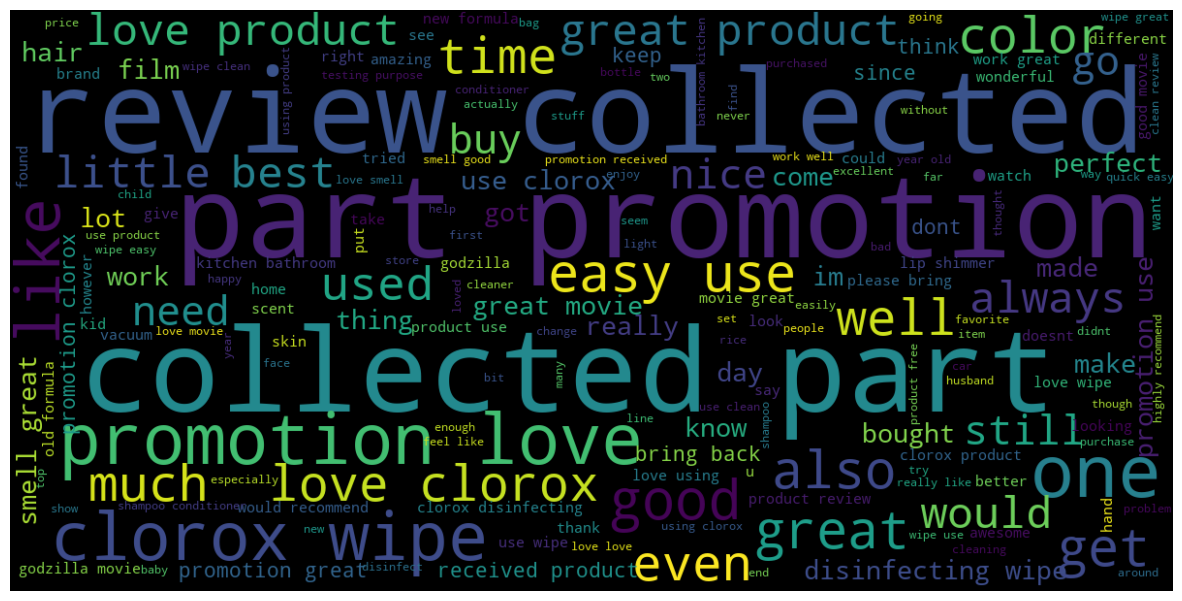

In [49]:
# Generate WordCloud plot for the cleaned reviews
stopwords = set(stopwords.words('english'))

wordcloud = WordCloud(stopwords=stopwords, max_words=300, max_font_size=40,
                      scale=3, random_state=1).generate(" ".join(reviews['cleaned_reviews_text'].dropna()))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## STEP 4: Feature Extraction

In [50]:
# Split the data into training and testing sets
x = reviews['cleaned_reviews_text']
y = reviews['user_sentiment']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23949,)
(5988,)
(23949,)
(5988,)


In [52]:
# Apply TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [53]:
# Display the shape of the transformed feature matrix
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF testing data shape:", X_test_tfidf.shape)

TF-IDF training data shape: (23949, 5000)
TF-IDF testing data shape: (5988, 5000)


In [54]:
# Display the top words in the TF-IDF vocabulary
print("Top words in TF-IDF vocabulary:")
print(tfidf_vectorizer.get_feature_names_out()[:20])

Top words in TF-IDF vocabulary:
['aaron' 'ability' 'able' 'able find' 'able get' 'able use' 'absolute'
 'absolute favorite' 'absolutely' 'absolutely love' 'absolutely loved'
 'absorbs' 'access' 'accessible' 'accident' 'accidentally' 'acne' 'across'
 'act' 'acting']


In [55]:
# Save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(tfidf_vectorizer, vec_file)

# Save the training and testing TF-IDF matrices
with open("X_train_tfidf.pkl", "wb") as train_file:
    pickle.dump(X_train_tfidf, train_file)

with open("X_test_tfidf.pkl", "wb") as test_file:
    pickle.dump(X_test_tfidf, test_file)

print("Files saved successfully using pickle.")

Files saved successfully using pickle.


## STEP 5: Model Building

In [56]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({1: 21441, 0: 2508})
Class distribution after SMOTE: Counter({1: 21441, 0: 21441})


In [57]:
def evaluate_model(y_test, y_pred, y_prob):
    accuracy = np.round((y_pred == y_test).mean() * 100, 2)
    precision = np.round(precision_score(y_test, y_pred) * 100, 2)
    recall = np.round(recall_score(y_test, y_pred) * 100, 2)
    f1 = np.round(f1_score(y_test, y_pred) * 100, 2)
    roc_auc = np.round(roc_auc_score(y_test, y_prob) * 100, 2)

    # Print metrics
    print("******************************")
    print(f"Accuracy is : {accuracy}%")
    print(f"Precision is : {precision}%")
    print(f"Recall is : {recall}%")
    print(f"F1 Score is : {f1}%")
    print(f"Roc-Auc Score is: {roc_auc}%")
    print("******************************")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    print("******************************")

    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix,annot=True, fmt='d',cmap='Blues',xticklabels=["Negative","Positive"],
                yticklabels=["Negative","Positive"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc}%)')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

### Logistic Regression

In [58]:
# Train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

******************************
Accuracy is : 87.89%
Precision is : 96.87%
Recall is : 89.37%
F1 Score is : 92.97%
Roc-Auc Score is: 90.2%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.45      0.75      0.57       627
           1       0.97      0.89      0.93      5361

    accuracy                           0.88      5988
   macro avg       0.71      0.82      0.75      5988
weighted avg       0.91      0.88      0.89      5988

******************************


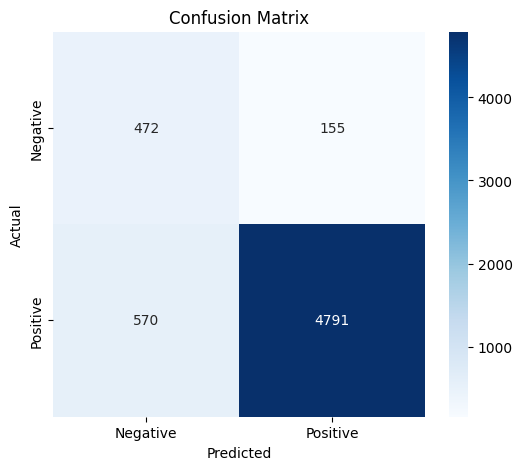

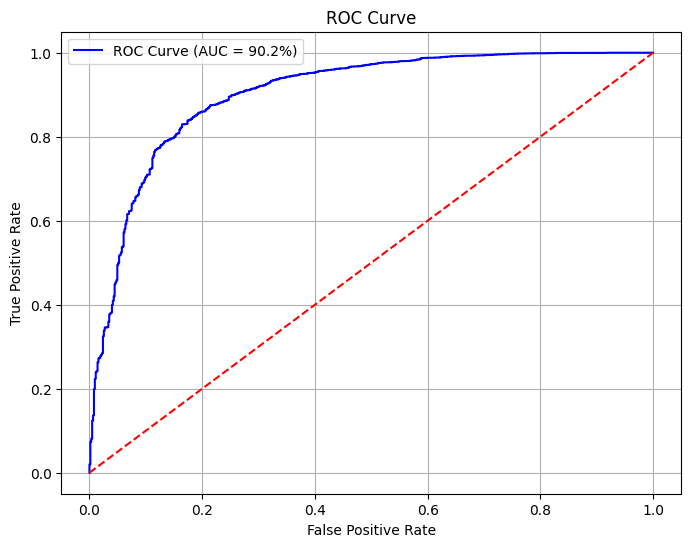

In [59]:
y_pred_lr = lr.predict(X_test_tfidf)
y_prob_lr = lr.predict_proba(X_test_tfidf)[:, 1]

evaluate_model(y_test, y_pred_lr, y_prob_lr)

### Random Forest

In [60]:
rf = RandomForestClassifier(random_state=42, n_estimators=300, max_depth=30, min_samples_split=2, min_samples_leaf=1)
rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=30, n_estimators=300, random_state=42)

******************************
Accuracy is : 88.41%
Precision is : 96.36%
Recall is : 90.47%
F1 Score is : 93.32%
Roc-Auc Score is: 90.38%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.71      0.56       627
           1       0.96      0.90      0.93      5361

    accuracy                           0.88      5988
   macro avg       0.71      0.81      0.75      5988
weighted avg       0.91      0.88      0.89      5988

******************************


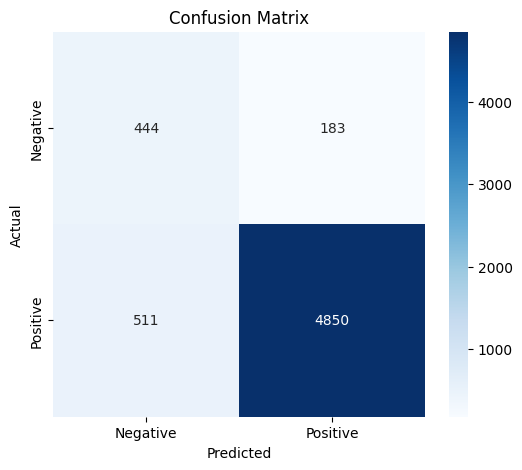

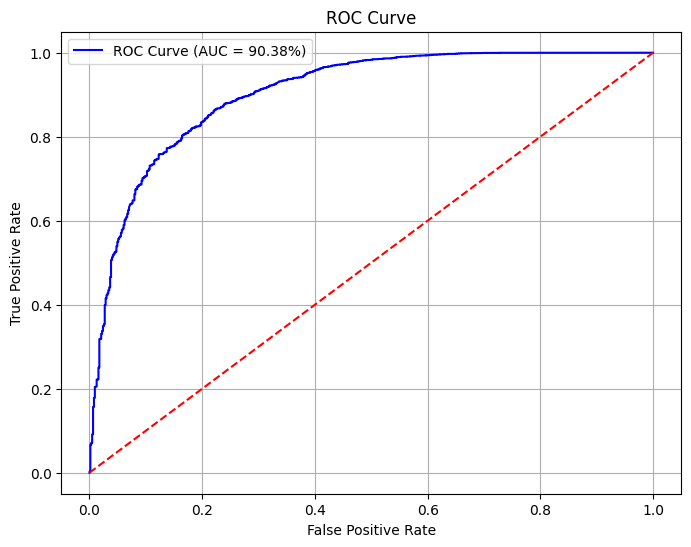

In [61]:
y_pred_rf = rf.predict(X_test_tfidf)
y_prob_rf = rf.predict_proba(X_test_tfidf)[:, 1]

evaluate_model(y_test, y_pred_rf, y_prob_rf)

### XGBoost

In [62]:
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

******************************
Accuracy is : 89.75%
Precision is : 95.62%
Recall is : 92.8%
F1 Score is : 94.19%
Roc-Auc Score is: 89.67%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.64      0.57       627
           1       0.96      0.93      0.94      5361

    accuracy                           0.90      5988
   macro avg       0.73      0.78      0.75      5988
weighted avg       0.91      0.90      0.90      5988

******************************


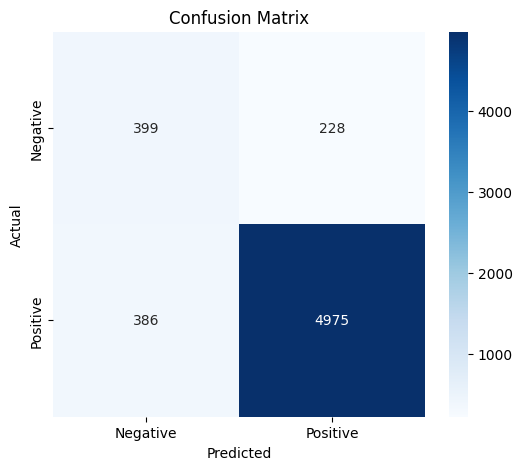

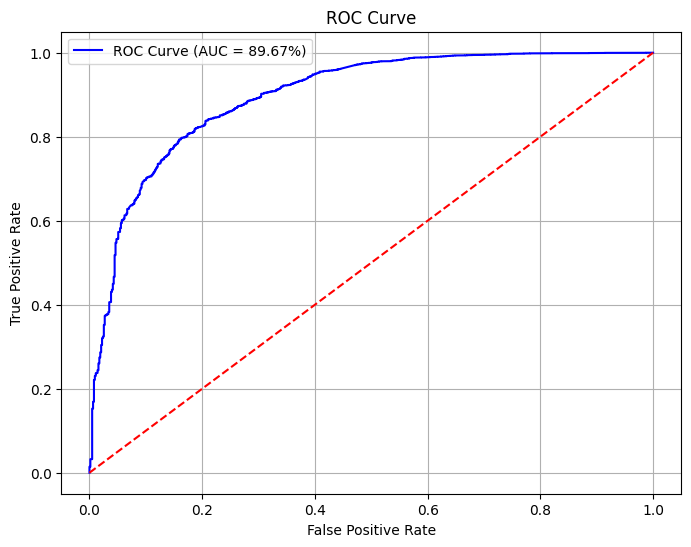

In [63]:
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)
y_prob_xgb = xgb_classifier.predict_proba(X_test_tfidf)[:, 1]

evaluate_model(y_test, y_pred_xgb, y_prob_xgb)

### Naive Bayes

In [64]:
nb = MultinomialNB()
nb.fit(X_train_balanced, y_train_balanced)

MultinomialNB()

******************************
Accuracy is : 82.0%
Precision is : 97.41%
Recall is : 82.07%
F1 Score is : 89.09%
Roc-Auc Score is: 89.2%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.35      0.81      0.49       627
           1       0.97      0.82      0.89      5361

    accuracy                           0.82      5988
   macro avg       0.66      0.82      0.69      5988
weighted avg       0.91      0.82      0.85      5988

******************************


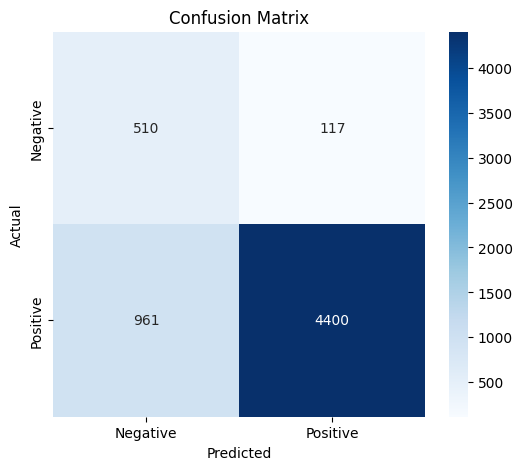

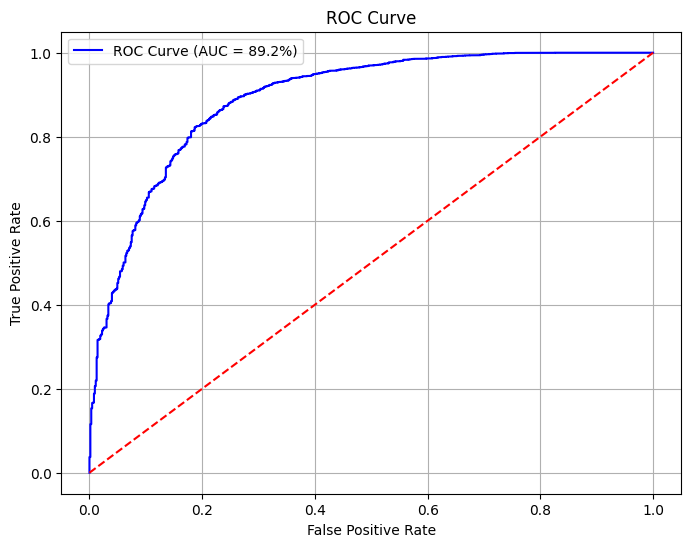

In [65]:
y_pred_nb = nb.predict(X_test_tfidf)
y_prob_nb = nb.predict_proba(X_test_tfidf)[:, 1]

evaluate_model(y_test, y_pred_nb, y_prob_nb)

### Model Inference

In [66]:
# Define a function to calculate and return evaluation metrics
def get_metrics(y_test, y_pred, y_prob, model_name):
    accuracy = np.round((y_pred == y_test).mean() * 100, 2)
    precision = np.round(precision_score(y_test, y_pred) * 100, 2)
    recall = np.round(recall_score(y_test, y_pred) * 100, 2)
    f1 = np.round(f1_score(y_test, y_pred) * 100, 2)
    roc_auc = np.round(roc_auc_score(y_test, y_prob) * 100, 2)

    return {
        'Model': model_name,
        'Accuracy (%)': accuracy,
        'Precision (%)': precision,
        'Recall (%)': recall,
        'F1-Score (%)': f1,
        'ROC-AUC (%)': roc_auc
    }

# Initialize an empty list to store metrics for each model
metrics_list = []

# Logistic Regression
metrics_list.append(get_metrics(y_test, y_pred_lr, y_prob_lr, 'Logistic Regression'))

# Random Forest
metrics_list.append(get_metrics(y_test, y_pred_rf, y_prob_rf, 'Random Forest'))

# XGBoost
metrics_list.append(get_metrics(y_test, y_pred_xgb, y_prob_xgb, 'XGBoost'))

# Naive Bayes
metrics_list.append(get_metrics(y_test, y_pred_nb, y_prob_nb, 'Naive Bayes'))

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
def display_metrics_table():
    import ace_tools_open as tools
    tools.display_dataframe_to_user("Model Evaluation Metrics", metrics_df)

# Call the function to display
display_metrics_table()

Model Evaluation Metrics


### Hyperparameter Tuning (Best Model-XGBoost)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
******************************
Accuracy is : 91.52%
Precision is : 95.57%
Recall is : 94.93%
F1 Score is : 95.25%
Roc-Auc Score is: 90.15%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.62      0.61       627
           1       0.96      0.95      0.95      5361

    accuracy                           0.92      5988
   macro avg       0.77      0.79      0.78      5988
weighted avg       0.92      0.92      0.92      5988

******************************


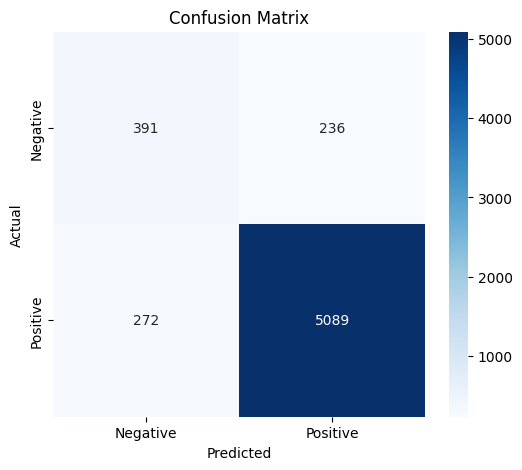

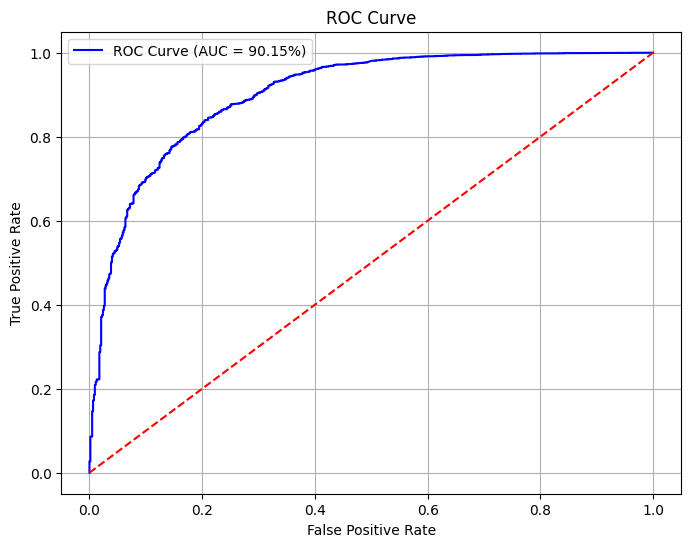

In [67]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_tfidf)
y_prob_best_xgb = best_xgb.predict_proba(X_test_tfidf)[:, 1]

# Evaluate the tuned XGBoost model
evaluate_model(y_test, y_pred_best_xgb, y_prob_best_xgb)

### Saving the model

In [68]:
# Save the trained XGBoost model to a file
model_filename = "xgboost_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb, file)

print(f"Model saved to {model_filename}")

Model saved to xgboost_model.pkl


### Loading the saved model

******************************
Accuracy is : 91.52%
Precision is : 95.57%
Recall is : 94.93%
F1 Score is : 95.25%
Roc-Auc Score is: 90.15%
******************************

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.62      0.61       627
           1       0.96      0.95      0.95      5361

    accuracy                           0.92      5988
   macro avg       0.77      0.79      0.78      5988
weighted avg       0.92      0.92      0.92      5988

******************************


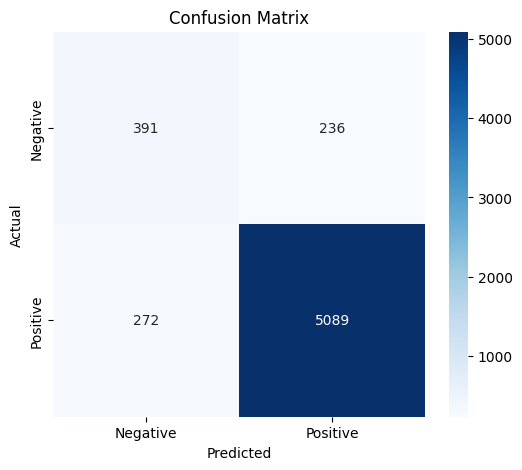

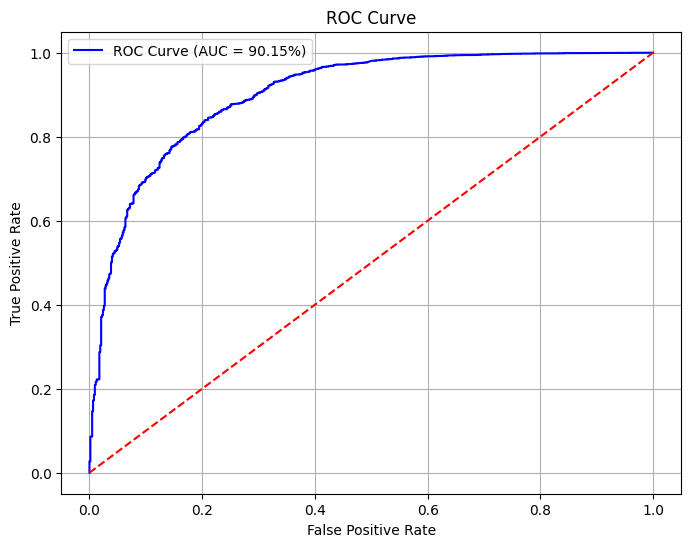

In [69]:
# Load the model
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model
y_pred_loaded = loaded_model.predict(X_test_tfidf)
y_prob_loaded = loaded_model.predict_proba(X_test_tfidf)[:, 1]

# Evaluate the loaded model
evaluate_model(y_test, y_pred_loaded, y_prob_loaded)

## STEP 6: Recommendation System
- User based recommendation
- User based prediction & evaluation
- Item based recommendation
- Item based prediction & evaluation

In [70]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29937 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    29937 non-null  object             
 1   brand                 29937 non-null  object             
 2   categories            29937 non-null  object             
 3   manufacturer          29937 non-null  object             
 4   name                  29937 non-null  object             
 5   reviews_date          29937 non-null  datetime64[ns, UTC]
 6   reviews_didPurchase   29937 non-null  object             
 7   reviews_doRecommend   29937 non-null  object             
 8   reviews_rating        29937 non-null  int64              
 9   reviews_text          29937 non-null  object             
 10  reviews_title         29937 non-null  object             
 11  reviews_username      29937 non-null  object             
 12  user_sent

In [71]:
ratings = reviews[['id', 'name', 'reviews_rating', 'reviews_username']]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29937 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29937 non-null  object
 1   name              29937 non-null  object
 2   reviews_rating    29937 non-null  int64 
 3   reviews_username  29937 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [72]:
# Test and Train split of the dataset
train, test = train_test_split(ratings, test_size=0.30, random_state=31)
print(train.shape)
print(test.shape)

(20955, 4)
(8982, 4)


In [73]:
train.duplicated().sum()

1103

In [74]:
train = train.groupby(['reviews_username', 'id'], as_index=False)['reviews_rating'].mean()

In [75]:
# Pivot the train ratings' dataset into matrix format in which columns are IDs and the rows are username
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as **0** during prediction. The producsts not rated by user is marked as **1** for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as **1**. This is just opposite of dummy_train.

In [76]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [77]:
# The products not rated by user is marked as 1 for prediction
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [78]:
# Convert the dummy train dataset into matrix format
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.



## User Similarity Matrix

### Using Cosine Similarity

In [79]:
# Creating the User Similarity Matrix using pairwise_distance function
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [80]:
user_correlation.shape

(18212, 18212)

### Using adjusted Cosine 

#### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user


In [81]:
# Create a user-product matrix
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Normalising the rating of the products for each user around 0 mean

In [82]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [83]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [84]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than **0**.

In [85]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [86]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 1.55829543, 3.20256308,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
user_predicted_ratings.shape

(18212, 255)

- Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [88]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.059436,0.0,0.0,0.0,0.915079,0.0,0.0,...,0.545545,0.0,0.0,0.0,0.0,0.0,0.0,1.558295,3.202563,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


### Finding the top 20 recommendation for the *user*

In [89]:
# Take the user ID as input
user_input = '00sab00'
print(user_input)

00sab00


In [90]:
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.059436,0.0,0.0,0.0,0.915079,0.0,0.0,...,0.545545,0.0,0.0,0.0,0.0,0.0,0.0,1.558295,3.202563,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [91]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
AVpfPaoqLJeJML435Xk9    59.497748
AVpfRTh1ilAPnD_xYic2    35.729246
AVpf0eb2LJeJML43EVSt    30.742364
AVpf2tw1ilAPnD_xjflC    14.335169
AVpf3VOfilAPnD_xjpun    13.632461
AVpfBrUZilAPnD_xTUly     9.001445
AVpfR5m0LJeJML436K3W     8.855751
AV1YGDqsGV-KLJ3adc-O     6.059436
AVpfOIrkilAPnD_xXgDG     5.859790
AVpe8gsILJeJML43y6Ed     5.789666
AVpf5Z1zLJeJML43FpB-     5.593060
AVpfJP1C1cnluZ0-e3Xy     5.046685
AVpfJcHuLJeJML433ZrY     4.983400
AVpfov9TLJeJML43A7B0     4.904701
AVpfKOYiilAPnD_xWOFw     3.750000
AVpfD9xTLJeJML431ig2     3.750000
AVpe_dxlilAPnD_xSiHI     3.520894
AVpf0thK1cnluZ0-r8vR     3.472494
AVpe31o71cnluZ0-YrSD     3.402466
AVpe4hlXLJeJML43xbrB     3.273268
Name: 00sab00, dtype: float64

In [92]:
# display the top 20 product id, name and similarity score 
final_recommendations = pd.DataFrame({'product_id': d.index, 'similarity_score': d})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, ratings, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,59.497748
3325,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,35.729246
4468,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),30.742364
5313,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),14.335169
5985,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,13.632461
14510,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",9.001445
14668,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,8.855751
14872,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,6.059436
15220,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),5.859790
15361,AVpe8gsILJeJML43y6Ed,"Pendaflex174 Divide It Up File Folder, Multi S...",5.789666


### Evaluation - User User

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [93]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1976, 4)

In [94]:
common.head()

,id,name,reviews_rating,reviews_username
21169,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj
8538,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jygibri
18735,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,4,jel08
22417,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,1,elena79
19297,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,angc


In [95]:
# convert into the user-movie matrix
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [96]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [97]:
df_subtracted.head(1)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
common.head(1)

,id,name,reviews_rating,reviews_username
21169,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj


In [100]:
list_name = common.reviews_username.tolist()
user_correlation_df.columns = df_subtracted.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [101]:
user_correlation_df_1.shape

(1660, 18212)

In [102]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [103]:
user_correlation_df_3 = user_correlation_df_2.T

In [104]:
user_correlation_df_3.head()

,1234,123charlie,37f5p,4cloroxl,50cal,7.87E+11,aac06002,abbey,abbi,abby,...,yesseniaw22,yeya,ygtz,yummy,zapman,zburt5,zebras,zippy,zitro,zxcsdfd
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
user_correlation_df_3.shape

(1660, 1660)

In [106]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.28867513, 0.        , 0.        , ..., 2.5423759 , 1.44337567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [107]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [108]:
dummy_test.shape

(1660, 127)

In [109]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [110]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1h6Gu0glJLPUi8IjA_,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [111]:
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [112]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [113]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [114]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.434039100061514


## Using Item similarity

### Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product. 

In [115]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the reviews rating for each products for using the Adujsted Cosine

In [116]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [117]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach


In [118]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [119]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - Item Item

In [120]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00600224, 0.06201728,
        0.        ],
       [0.        , 0.        , 0.01254045, ..., 0.00108461, 0.        ,
        0.        ],
       [0.        , 0.        , 0.02090075, ..., 0.00180769, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00515466]])

In [121]:
item_predicted_ratings.shape

(18212, 255)

In [122]:
dummy_train.shape

(18212, 255)

### Filtering the rating only for the products not rated by the user for recommendation

In [123]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.011345,0.001677,0.0,0.010336,0.0,0.0,0.033075,0.006002,0.062017,0.000000
01impala,0.0,0.0,0.012540,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.004564,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001085,0.000000,0.000000
02dakota,0.0,0.0,0.020901,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.007607,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001808,0.000000,0.000000
02deuce,0.0,0.0,0.016721,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.006085,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001446,0.000000,0.000000
06stidriver,0.0,0.0,0.000000,0.000454,0.0,0.0,0.0,0.001731,0.001915,0.000000,...,0.000000,0.000000,0.0,0.003187,0.0,0.0,0.000000,0.000000,0.000000,0.006443


### Finding the top 20 recommendation for the *user*

In [124]:
# Take the user ID as input
user_input = '06stidriver'
print(user_input)

06stidriver


In [125]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
AVpfJP1C1cnluZ0-e3Xy    0.674485
AVpe8q4T1cnluZ0-afct    0.022082
AVpe_5U_ilAPnD_xSrxG    0.019124
AVpf7I3i1cnluZ0-tnL6    0.018986
AVpf5ujMilAPnD_xkQVi    0.012838
AVpfTVkcilAPnD_xZLts    0.011672
AVpe-ltS1cnluZ0-bL8w    0.009876
AVpe_N91LJeJML43z4jD    0.008853
AVpfIfnYilAPnD_xVpGi    0.007807
AVpfRTh1ilAPnD_xYic2    0.006839
AVpfluP1ilAPnD_xejxO    0.006762
AVpfvieo1cnluZ0-qdnu    0.006443
AVpfm8yiLJeJML43AYyu    0.006341
AVpfbraG1cnluZ0-kqnn    0.006048
AVpfW8y_LJeJML437ySW    0.005794
AVpfBU2S1cnluZ0-cJsO    0.004523
AVpe8xjUilAPnD_xRkxC    0.004253
AVpe6CHv1cnluZ0-ZhwN    0.004056
AVpfBpnEilAPnD_xTUBx    0.003614
AVpe6FfKilAPnD_xQmHi    0.003592
Name: 06stidriver, dtype: float64

In [126]:
item_final_recommendations = pd.DataFrame({'product_id': d.index, 'similarity_score': d})
item_final_recommendations.reset_index(drop=True)

pd.merge(item_final_recommendations, ratings, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,0.674485
2039,AVpe8q4T1cnluZ0-afct,"Newman's Own Organics Licorice Twist, Black 5oz",0.022082
2045,AVpe_5U_ilAPnD_xSrxG,Sea Gull Lighting Six Light Bath Sconce/vanity...,0.019124
2048,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,0.018986
2077,AVpf5ujMilAPnD_xkQVi,D-Con Mice Bait Station - 3ct,0.012838
2084,AVpfTVkcilAPnD_xZLts,Queen Helene Cocoa Butter Solid,0.011672
2093,AVpe-ltS1cnluZ0-bL8w,Stander Pt Bedcane - Bed Handle,0.009876
2104,AVpe_N91LJeJML43z4jD,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,0.008853
2114,AVpfIfnYilAPnD_xVpGi,Soothing Touch Lemon Cardamom Vegan Lip Balm ....,0.007807
2120,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,0.006839


### Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [127]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [128]:
common =  test[test.id.isin(train.id)]
common.shape

(8964, 4)

In [129]:
common.head()

,id,name,reviews_rating,reviews_username
21384,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,curlyd
14483,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,prip
21169,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,jjjj
25411,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,internetfreak69
20351,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,hb6851


In [130]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [131]:
common_item_based_matrix.shape

(203, 8348)

In [132]:
item_correlation_df = pd.DataFrame(item_correlation)

In [133]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013954,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078102,0.0,0.0,0.0,0.0,0.0,0.0,0.001989,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [135]:
list_name = common.id.tolist()

In [136]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [137]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [138]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.013954,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003657,0.0,...,0.0,0.078102,0.0,0.0,0.0,0.0,0.0,0.001989,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [139]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02105944, 0.00045358, 0.00036287, ..., 0.00045358, 0.00018143,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00733409],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10336214],
       [0.        , 0.00644332, 0.00515466, ..., 0.00644332, 0.00257733,
        0.        ]])

In [140]:
common_item_predicted_ratings.shape

(203, 8348)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [141]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [142]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [143]:
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [144]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [145]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5776631107239676


In [146]:
# Saving the user-based model as the RMSE score was less there
model_filename = "recommendation_model.pkl"

with open(model_filename, "wb") as model_file:
    pickle.dump(user_final_rating, model_file)
    
print(f"Model saved to {model_filename}")

Model saved to recommendation_model.pkl


## Step 7: Fine-Tuning the recommendation system

In [147]:
# Load the pickled models and data
with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    tfidf_vectorizer = pickle.load(vec_file)

with open('xgboost_model.pkl', 'rb') as xgb_file:
    sentiment_model = pickle.load(xgb_file)

with open('recommendation_model.pkl', 'rb') as rec_file:
    recommendation_model = pickle.load(rec_file)

In [148]:
# Function to fetch top 20 recommendations for a user
def get_top_20_recommendations(user_input):
    try:
        top_20_recommendations = recommendation_model.loc[user_input].sort_values(ascending=False)[:20]
        print(f"Top 20 recommendations fetched for user: {user_input}")
        return top_20_recommendations
    except KeyError:
        print(f"User name {user_input} doesn't exist in the recommendation model.")
        return None

# Input: User ID
user_input = '00sab00'
top_20_recommendations = get_top_20_recommendations(user_input)

Top 20 recommendations fetched for user: 00sab00


In [149]:
# Function to calculate sentiment-based metrics for recommended products
def calculate_sentiments_with_metrics(top_20_recommendations):
    sentiment_scores = []
    metrics_data = []

    for product_id in top_20_recommendations.index:
        product_reviews = reviews[reviews['id'] == product_id]['cleaned_reviews_text']
        if not product_reviews.empty:
            # Predict sentiments
            product_sentiments = sentiment_model.predict(tfidf_vectorizer.transform(product_reviews))
            
            # Calculate metrics
            pos_review_count = product_sentiments.sum()
            total_review_count = len(product_sentiments)
            positive_percentage = (pos_review_count / total_review_count) * 100
            
            # Append to metrics data
            metrics_data.append({
                "Product ID": product_id,
                "pos_review_count": pos_review_count,
                "total_review_count": total_review_count,
                "pos_sentiment_percent": positive_percentage
            })
        else:
            # No reviews for the product
            metrics_data.append({
                "Product ID": product_id,
                "pos_review_count": 0,
                "total_review_count": 0,
                "pos_sentiment_percent": 0
            })

    print("Sentiment-based metrics calculated for top 20 products.")
    return pd.DataFrame(metrics_data)

if top_20_recommendations is not None:
    sentiment_metrics_df = calculate_sentiments_with_metrics(top_20_recommendations)

Sentiment-based metrics calculated for top 20 products.


In [150]:
# Function to display sentiment-based metrics in tabular format
def display_sentiment_metrics(sentiment_metrics_df):
    # Select and reorder columns for better readability
    columns_to_display = ['Product ID', 'pos_review_count', 'total_review_count', 'pos_sentiment_percent']
    original_df = sentiment_metrics_df[columns_to_display]

    # Rename columns for better clarity
    original_df.rename(columns={
        'Product ID': 'Product ID',
        'pos_review_count': 'Positive Review Count',
        'total_review_count': 'Total Review Count',
        'pos_sentiment_percent': 'Positive Sentiment (%)'
    }, inplace=True)

    # Return the DataFrame for tabular display
    return original_df

if top_20_recommendations is not None:
    metrics_table = display_sentiment_metrics(sentiment_metrics_df)
    display(metrics_table)

,Product ID,Positive Review Count,Total Review Count,Positive Sentiment (%)
0,AVpfPaoqLJeJML435Xk9,2877,3325,86.526316
1,AVpfRTh1ilAPnD_xYic2,1106,1143,96.762905
2,AVpf0eb2LJeJML43EVSt,818,845,96.804734
3,AVpf2tw1ilAPnD_xjflC,637,672,94.791667
4,AVpf3VOfilAPnD_xjpun,8481,8525,99.483871
5,AVpfBrUZilAPnD_xTUly,144,158,91.139241
6,AVpfR5m0LJeJML436K3W,188,204,92.156863
7,AV1YGDqsGV-KLJ3adc-O,272,348,78.160920
8,AVpfOIrkilAPnD_xXgDG,119,141,84.397163
9,AVpe8gsILJeJML43y6Ed,273,310,88.064516


In [151]:
# Function to select and display top 5 products with positive sentiment
def display_top_5_products_with_metrics(sentiment_metrics_df):
    # Sort by positive sentiment percentage
    top_5_df = sentiment_metrics_df.sort_values(by='pos_sentiment_percent', ascending=False)[:5]
    
    # Merge with product names for display
    top_5_df = pd.merge(
        top_5_df,
        reviews[['id', 'name']].drop_duplicates(),
        left_on='Product ID',
        right_on='id'
    )
    top_5_df = top_5_df[['Product ID', 'name', 'pos_review_count', 'total_review_count', 'pos_sentiment_percent']]
    
    # Apply Pandas styling
    styled_df = (
        top_5_df.style
        .set_caption("Top 5 Product Recommendations Based on Positive Sentiments")
        .format({"pos_sentiment_percent": "{:.2f}%"})
        .background_gradient(subset=["pos_sentiment_percent"], cmap="Greens")
    )
    
    # Display the styled DataFrame
    display(styled_df)

if top_20_recommendations is not None:
    display_top_5_products_with_metrics(sentiment_metrics_df)

,Product ID,name,pos_review_count,total_review_count,pos_sentiment_percent
0,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8481,8525,99.48%
1,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,2015,2039,98.82%
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),818,845,96.80%
3,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1106,1143,96.76%
4,AVpe4hlXLJeJML43xbrB,Hawaiian Punch Berry Limeade Blast Juice,21,22,95.45%
